In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("./data/train_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 98 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age                                  103904 non-null  float64
 1   Flight Distance                      103904 non-null  float64
 2   Departure Delay in Minutes           103904 non-null  float64
 3   Arrival Delay in Minutes             103904 non-null  float64
 4   Service Score                        103904 non-null  float64
 5   Departure Delay                      103904 non-null  int64  
 6   Arrival Delay                        103904 non-null  int64  
 7   Long Distance Flight                 103904 non-null  int64  
 8   Class_Business                       103904 non-null  int64  
 9   Class_Eco                            103904 non-null  int64  
 10  Class_Eco Plus                       103904 non-null  int64  
 11  Inflight wifi

<div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">Splitting the data 🔧</h1>
</div>


In [3]:
target = data['satisfaction']
data = data.drop(columns=["satisfaction"])
le = LabelEncoder()
target_encoded = le.fit_transform(target)

In [4]:
X = data
y = target_encoded
X.shape, y.shape

((103904, 97), (103904,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

X_train.shape,  X_test.shape 

((93513, 97), (10391, 97))

<div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">The first way to select hyperparameters 🔧</h1>
</div>


### Selection of the optimal regularization parameter alpha (for 1 hidden layer of 50 neurons)

In [6]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

alpha_arr = np.logspace(-4, 1, 20)

train_err, test_err = [], []
train_acc, test_acc = [], []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(
        alpha=alpha,
        hidden_layer_sizes=(64, 32),
        solver='adam',
        activation='relu',
        max_iter=1000,
        random_state=42
    )

    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

best_alpha = alpha_arr[np.argmax(test_acc)]
best_test_acc = np.max(test_acc)
print(f"Best alpha: {best_alpha:.5f} with test accuracy: {best_test_acc:.4f}")

Best alpha: 0.14384 with test accuracy: 0.9633
Wall time: 22min 23s


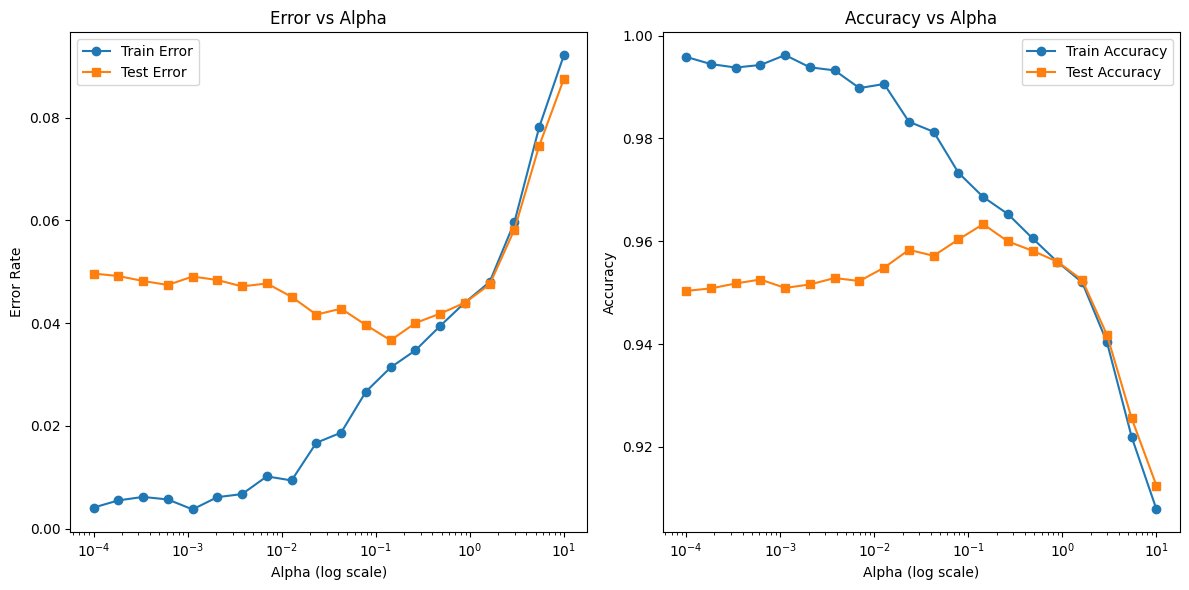

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogx(alpha_arr, train_err, label='Train Error', marker='o')
plt.semilogx(alpha_arr, test_err, label='Test Error', marker='s')
plt.title("Error vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Error Rate")
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(alpha_arr, train_acc, label='Train Accuracy', marker='o')
plt.semilogx(alpha_arr, test_acc, label='Test Accuracy', marker='s')
plt.title("Accuracy vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## Classifier training at the optimal alpha value (for 1 hidden layer of 50 neurons)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

alpha_local_opt = 0.14384

mlp_model = MLPClassifier(
    alpha=alpha_local_opt,
    hidden_layer_sizes=(64, 32),
    solver='adam',
    activation='relu',
    max_iter=1000,
    random_state=42
)

mlp_model.fit(X_train, y_train)

MLPClassifier(alpha=0.14384, hidden_layer_sizes=(64, 32), max_iter=1000,
              random_state=42)

In [9]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"✅ Error on the training set: {err_train:.4f}")
print(f"✅ Error on the testing set:  {err_test:.4f}")
print(f"🎯 Accuracy on the training set: {acc_train:.4f}")
print(f"🎯 Accuracy on the testing set:  {acc_test:.4f}")

print("\n📋 Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

✅ Error on the training set: 0.0308
✅ Error on the testing set:  0.0371
🎯 Accuracy on the training set: 0.9692
🎯 Accuracy on the testing set:  0.9629

📋 Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5900
           1       0.97      0.94      0.96      4491

    accuracy                           0.96     10391
   macro avg       0.96      0.96      0.96     10391
weighted avg       0.96      0.96      0.96     10391



## Selection of the neurons number of 1 hidden layer for the optimal (for 1 hidden layer of 50 neurons) alpha value

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

alpha_local_opt = 0.14384

hidden_layer_sizes = np.arange(5, 25, 1)  # [5, 10, ..., 50]

train_err, test_err = [], []
train_acc, test_acc = [], []

for size in hidden_layer_sizes:
    mlp_model = MLPClassifier(
        alpha=alpha_local_opt,
        hidden_layer_sizes=(size,),  # 1 hidden layer
        solver='lbfgs',
        activation='logistic',
        max_iter=1000,
        random_state=42
    )
    
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

best_size = hidden_layer_sizes[np.argmax(test_acc)]
best_acc = np.max(test_acc)

print(f"\n🔍 Best hidden layer size: {best_size} with test accuracy: {best_acc:.4f}")


🔍 Best hidden layer size: 10 with test accuracy: 0.9636


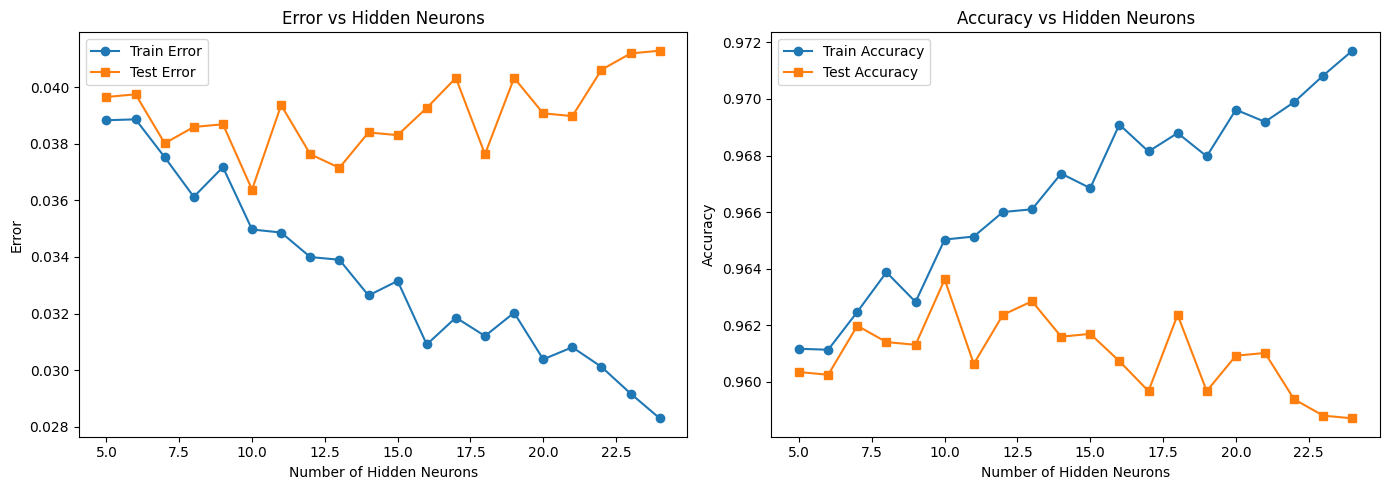

In [11]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes, train_err, 'o-', label='Train Error')
plt.plot(hidden_layer_sizes, test_err, 's-', label='Test Error')
plt.title("Error vs Hidden Neurons")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Error")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes, train_acc, 'o-', label='Train Accuracy')
plt.plot(hidden_layer_sizes, test_acc, 's-', label='Test Accuracy')
plt.title("Accuracy vs Hidden Neurons")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## Training a neural network with the optimal alpha value (for 1 hidden layer of 50 neurons) and the optimal neurons number in the first hidden layer (for a given alpha)¶

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

alpha_local_opt = 0.14384
hidden_layer_local_opt_1 = 10 

final_mlp_model = MLPClassifier(
    alpha=alpha_local_opt,
    hidden_layer_sizes=(hidden_layer_local_opt_1,),
    solver='lbfgs',
    activation='logistic',
    max_iter=1000,
    random_state=42
)

final_mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.14384, hidden_layer_sizes=(10,),
              max_iter=1000, random_state=42, solver='lbfgs')

In [13]:
y_train_pred = final_mlp_model.predict(X_train)
y_test_pred = final_mlp_model.predict(X_test)

train_err = np.mean(y_train != y_train_pred)
test_err = np.mean(y_test != y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("✅ Final Model Evaluation")
print(f"Training Error: {train_err:.4f} | Accuracy: {train_acc:.4f}")
print(f"Testing  Error: {test_err:.4f} | Accuracy: {test_acc:.4f}")

print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

✅ Final Model Evaluation
Training Error: 0.0350 | Accuracy: 0.9650
Testing  Error: 0.0364 | Accuracy: 0.9636

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5900
           1       0.97      0.94      0.96      4491

    accuracy                           0.96     10391
   macro avg       0.96      0.96      0.96     10391
weighted avg       0.96      0.96      0.96     10391



### Selection of the neurons number in the second hidden layer with the optimal alpha value (for 1 hidden layer of 50 neurons) and the optimal neurons number in the first hidden layer (for a given alpha)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

alpha_local_opt = 0.14384      
hidden_layer_local_opt_1 = 10     

second_layer_sizes = np.arange(5, 55, 2)

train_err, test_err = [], []
train_acc, test_acc = [], []

for size in second_layer_sizes:
    mlp_model = MLPClassifier(
        alpha=alpha_local_opt,
        hidden_layer_sizes=(hidden_layer_local_opt_1, size),
        solver='adam',
        activation='relu',
        max_iter=1000,
        early_stopping=True,
        random_state=42
    )

    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

best_second = second_layer_sizes[np.argmax(test_acc)]
best_test_acc = np.max(test_acc)

print(f"🔍 Best 2nd hidden layer size: {best_second} with test accuracy: {best_test_acc:.4f}")

🔍 Best 2nd hidden layer size: 45 with test accuracy: 0.9628


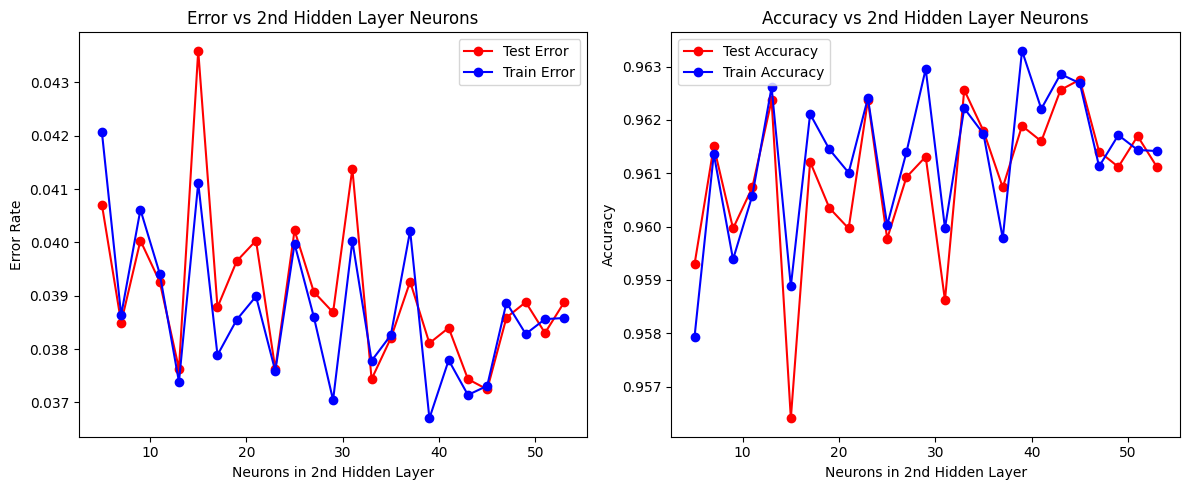

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(second_layer_sizes, test_err, 'ro-', label='Test Error')
plt.plot(second_layer_sizes, train_err, 'bo-', label='Train Error')
plt.title("Error vs 2nd Hidden Layer Neurons")
plt.xlabel("Neurons in 2nd Hidden Layer")
plt.ylabel("Error Rate")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(second_layer_sizes, test_acc, 'ro-', label='Test Accuracy')
plt.plot(second_layer_sizes, train_acc, 'bo-', label='Train Accuracy')
plt.title("Accuracy vs 2nd Hidden Layer Neurons")
plt.xlabel("Neurons in 2nd Hidden Layer")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


### Training a neural network with the optimal alpha value (for 1 hidden layer of 50 neurons), optimal neurons numbers in the first and second hidden layers

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Tuned hyperparameters
alpha_local_opt = 0.14384
hidden_layer_local_opt_1 = 10
hidden_layer_local_opt_2 = 45

# Build the final model (two hidden layers)
final_model = MLPClassifier(
    alpha=alpha_local_opt,
    hidden_layer_sizes=(hidden_layer_local_opt_1, hidden_layer_local_opt_2),
    solver='lbfgs',
    activation='logistic',
    max_iter=1000,
    random_state=42
)

# Model training
final_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.14384, hidden_layer_sizes=(10, 45),
              max_iter=1000, random_state=42, solver='lbfgs')

In [17]:
# Make predictions
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Errors and accuracy
train_err = np.mean(y_train != y_train_pred)
test_err = np.mean(y_test != y_test_pred)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Output results
print("✅ Final Model Evaluation")
print(f"Training Error: {train_err:.4f} | Accuracy: {train_acc:.4f}")
print(f"Testing  Error: {test_err:.4f} | Accuracy: {test_acc:.4f}")

# output classification report
print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

✅ Final Model Evaluation
Training Error: 0.0327 | Accuracy: 0.9673
Testing  Error: 0.0351 | Accuracy: 0.9649

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5900
           1       0.97      0.95      0.96      4491

    accuracy                           0.96     10391
   macro avg       0.97      0.96      0.96     10391
weighted avg       0.96      0.96      0.96     10391



##  Why MLPClassifier Performed Slightly Lower than XGBoost/LightGBM

Although I performed hyperparameter tuning on `MLPClassifier` (e.g., adjusting alpha and hidden layer sizes), its final test accuracy (96.49%) was still slightly lower than that of `XGBClassifier` (96.56%) and `LGBMClassifier` (96.55%). This is expected and reasonable based on the nature of the models and data.

### 🔬 Model Comparison

| Aspect                     | MLPClassifier                                  | XGBoost / LightGBM                           |
|---------------------------|------------------------------------------------|----------------------------------------------|
| Suitable Data Type        | High-dimensional data (e.g., images, text)     | Structured/tabular data                      |
| Training Strategy         | Neural networks via backpropagation            | Gradient Boosted Decision Trees              |
| Missing Value Handling    | Not supported directly                         | Supported natively                           |
| Parameter Sensitivity     | High (learning rate, layer size, etc.)         | Lower; robust with default settings          |
| Interpretability          | Lower                                          | Higher (feature importance available)        |
| Final Accuracy (Test Set) | ✅ 0.9649                                       | ✅ 0.9656 (XGB), ✅ 0.9655 (LGBM)             |

### ✅ Conclusion

While the MLP model achieved very competitive results after tuning, tree-based ensemble models such as **XGBoost and LightGBM** are generally better suited for structured data tasks and demonstrated slightly better generalization in this case.

🟢 Therefore, **XGBoost is selected as the final model** for deployment.
